In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
Supermarket_Sales = pd.read_csv(r'C:\Users\USER\Downloads\archive (9).zip')
Supermarket_Sales.head(5)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [24]:
Supermarket_Sales['Product line']

0           Health and beauty
1      Electronic accessories
2          Home and lifestyle
3           Health and beauty
4           Sports and travel
                ...          
995         Health and beauty
996        Home and lifestyle
997        Food and beverages
998        Home and lifestyle
999       Fashion accessories
Name: Product line, Length: 1000, dtype: object

In [25]:
Supermarket_Sales['City']

0         Yangon
1      Naypyitaw
2         Yangon
3         Yangon
4         Yangon
         ...    
995    Naypyitaw
996     Mandalay
997       Yangon
998       Yangon
999       Yangon
Name: City, Length: 1000, dtype: object

### Who spends more? Male or Female

In [45]:
Supermarket_Sales.groupby('Gender').sum(numeric_only=True)

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
Gender,,,,,,,,
Female,27687.24,2869,7994.425,167882.925,159888.50,2385.714286,7994.425,3489.2
Male,27984.89,2641,7384.944,155083.824,147698.88,2376.190476,7384.944,3483.5


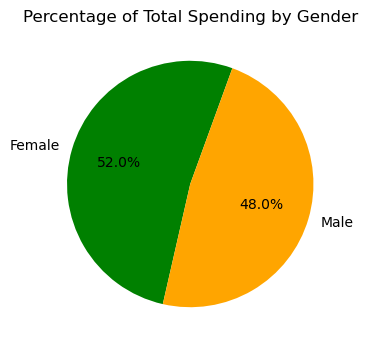

In [59]:
Spend_Gender = Supermarket_Sales.groupby('Gender').sum(numeric_only=True)
colors = ['green', 'orange']
Spend_Gender['Total'].plot(kind='pie',colors=colors,autopct='%1.1f%%', startangle=70, figsize=(4, 4))
plt.title('Percentage of Total Spending by Gender')
plt.ylabel('')
plt.show()

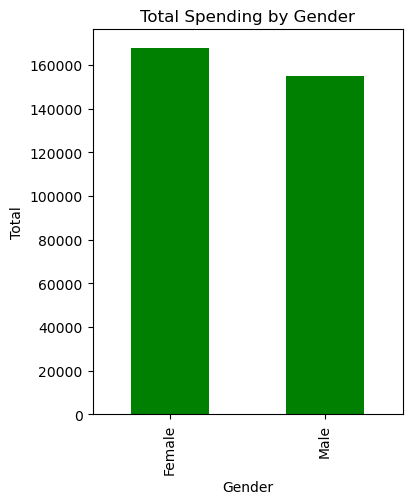

In [62]:
Spend_Gender = Supermarket_Sales.groupby('Gender').sum(numeric_only=True)['Total']
color = ['green']
Spend_Gender.plot(kind = 'bar',color = color,figsize=(4,5))
colour = ['green']
plt.title('Total Spending by Gender')
plt.ylabel('Total')
plt.xlabel('Gender')
plt.show()

### Which City has more female shoppers and Which City has more male shoppers

In [67]:
Supermarket_Sales.groupby(['City', 'Gender']).count()

Invoice ID  Branch  Customer type  Product line  Unit price  \
City      Gender                                                                
Mandalay  Female         162     162            162           162         162   
          Male           170     170            170           170         170   
Naypyitaw Female         178     178            178           178         178   
          Male           150     150            150           150         150   
Yangon    Female         161     161            161           161         161   
          Male           179     179            179           179         179   

                  Quantity  Tax 5%  Total  Date  Time  Payment  cogs  \
City      Gender                                                       
Mandalay  Female       162     162    162   162   162      162   162   
          Male         170     170    170   170   170      170   170   
Naypyitaw Female       178     178    178   178   178      178   178   
          Male         150     150    150   150   150      150   150   
Yangon    Female       161     161    161   161   161      161   161   
          Male         179     179    179   179   179      179   179   

                  gross margin percentage  gross income  Rating  
City      Gender                                                 
Mandalay  Female                      162           162     162  
          Male                        170           170     170  
Naypyitaw Female                      178           178     178  
          Male                        150           150     150  
Yangon    Female                      161           161     161  
          Male                        179           179     179

In [68]:
male_shoppers = Supermarket_Sales.groupby(['City', 'Gender']).count()['Customer type']
print(male_shoppers)

City       Gender
Mandalay   Female    162
           Male      170
Naypyitaw  Female    178
           Male      150
Yangon     Female    161
           Male      179
Name: Customer type, dtype: int64


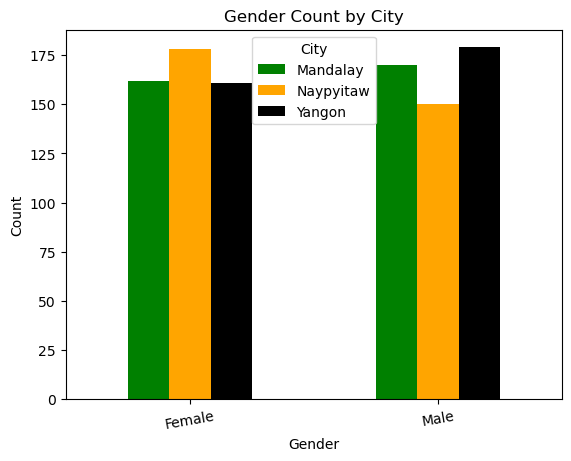

In [85]:
male_shoppers.unstack(level=0).plot(kind='bar', color=['green', 'orange','black'])
plt.title('Gender Count by City')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=10)
plt.legend(title='City',loc= 'upper center')
plt.show()

### Who spends more? Members or Normal

In [96]:
Spend_customer= Supermarket_Sales.groupby('Customer type').sum('Total')
print(Spend_customer)

               Unit price  Quantity    Tax 5%       Total       cogs  \
Customer type                                                          
Member           28159.70      2785  7820.164  164223.444  156403.28   
Normal           27512.43      2725  7559.205  158743.305  151184.10   

               gross margin percentage  gross income  Rating  
Customer type                                                 
Member                     2385.714286      7820.164  3477.1  
Normal                     2376.190476      7559.205  3495.6  


In [107]:
Spend_customer = Supermarket_Sales.groupby('Customer type').sum(numeric_only=True)['Total']
print(Spend_customer)

Customer type
Member    164223.444
Normal    158743.305
Name: Total, dtype: float64


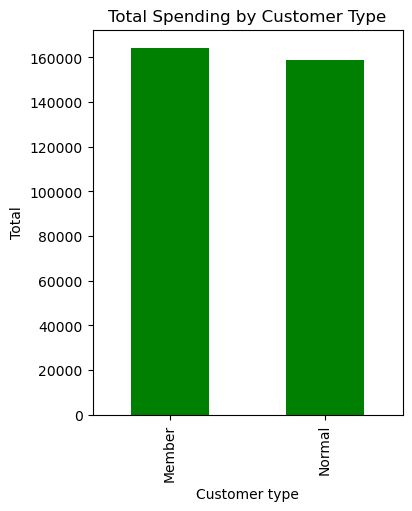

In [108]:
Spend_customer = Supermarket_Sales.groupby('Customer type').sum(numeric_only=True)['Total']
Spend_customer.plot(kind = 'bar',color = ['green'],figsize=(4,5))
plt.title('Total Spending by Customer Type')
plt.ylabel('Total')
plt.xlabel('Customer type')
plt.show()

### What Product line sells most

In [110]:
Best_Product =  Supermarket_Sales.groupby('Product line').sum(numeric_only=True)['Total']
print(Best_Product)

Product line
Electronic accessories    54337.5315
Fashion accessories       54305.8950
Food and beverages        56144.8440
Health and beauty         49193.7390
Home and lifestyle        53861.9130
Sports and travel         55122.8265
Name: Total, dtype: float64


In [111]:
Best_Product =  Supermarket_Sales.groupby('Product line').count()['Invoice ID']
print(Best_Product)

Product line
Electronic accessories    170
Fashion accessories       178
Food and beverages        174
Health and beauty         152
Home and lifestyle        160
Sports and travel         166
Name: Invoice ID, dtype: int64


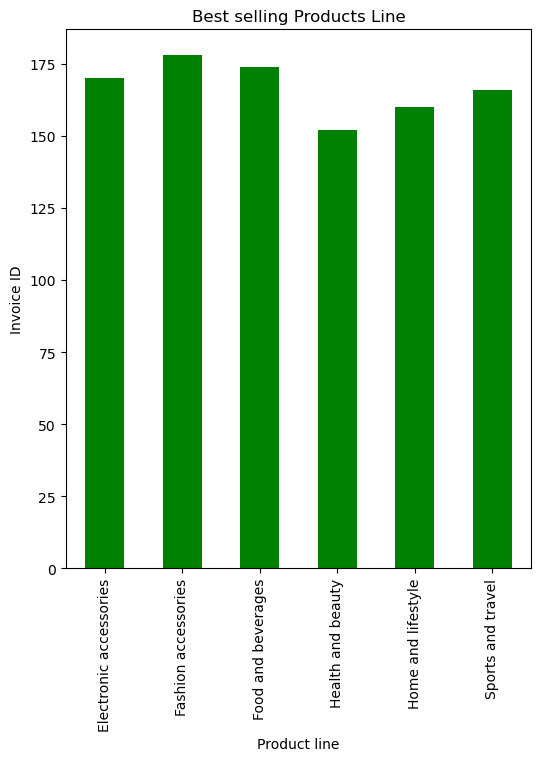

In [114]:
Best_Product =  Supermarket_Sales.groupby('Product line').count()['Invoice ID']
Best_Product.plot(kind = 'bar',color = ['green'],figsize=(6,7))

plt.title('Best selling Products Line')
plt.ylabel('Invoice ID')
plt.xlabel('Product line')
plt.show()

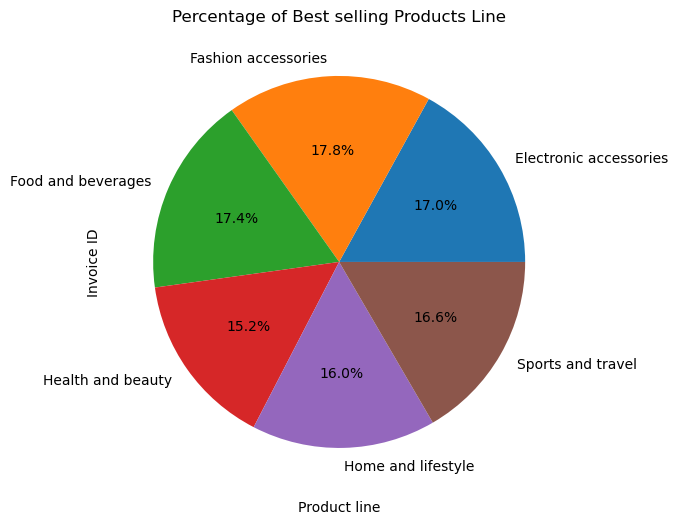

In [117]:
Best_Product =  Supermarket_Sales.groupby('Product line').count()['Invoice ID']
Best_Product.plot(kind = 'pie', autopct='%1.1f%%',figsize=(6,7))

plt.title('Percentage of Best selling Products Line')
plt.ylabel('Invoice ID')
plt.xlabel('Product line')
plt.show()

###Product line popularity, men or women

 ### Product line popularity, men or women

In [142]:
Product_Popularity =  Supermarket_Sales.groupby(['Product line','Gender']).count()['Invoice ID']
print(Product_Popularity)

Product line            Gender
Electronic accessories  Female    84
                        Male      86
Fashion accessories     Female    96
                        Male      82
Food and beverages      Female    90
                        Male      84
Health and beauty       Female    64
                        Male      88
Home and lifestyle      Female    79
                        Male      81
Sports and travel       Female    88
                        Male      78
Name: Invoice ID, dtype: int64


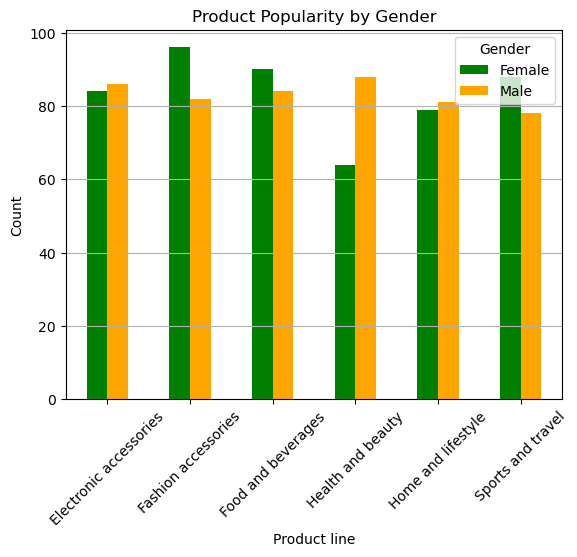

In [156]:
Product_Popularity.unstack(level=1).plot(kind='bar', color=['green', 'orange','black','blue','purple','red'])
plt.title('Product Popularity by Gender')
plt.xlabel('Product line')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Gender',loc= 'best')
plt.grid(axis = 'y')
plt.show()

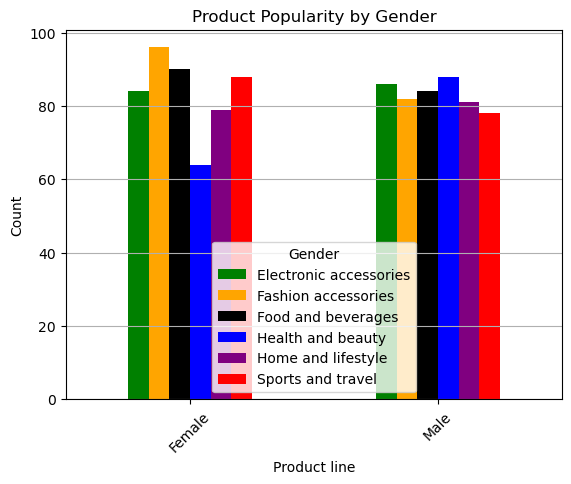

In [160]:
Product_Popularity.unstack(level=0).plot(kind='bar', color=['green', 'orange','black','blue','purple','red'])
plt.title('Product Popularity by Gender')
plt.xlabel('Product line')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Gender',loc= 'best')
plt.grid(axis = 'y')
plt.show()

### Days of the month with most sales and month with most sales

In [162]:
 Supermarket_Sales.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [165]:
 Supermarket_Sales['Date']

0       1/5/2019
1       3/8/2019
2       3/3/2019
3      1/27/2019
4       2/8/2019
         ...    
995    1/29/2019
996     3/2/2019
997     2/9/2019
998    2/22/2019
999    2/18/2019
Name: Date, Length: 1000, dtype: object

####convert date from object to datw time

#####convert date from object to datetime

##### convert date from object to datetime

In [167]:
pd.to_datetime( Supermarket_Sales['Date'])

0     2019-01-05
1     2019-03-08
2     2019-03-03
3     2019-01-27
4     2019-02-08
         ...    
995   2019-01-29
996   2019-03-02
997   2019-02-09
998   2019-02-22
999   2019-02-18
Name: Date, Length: 1000, dtype: datetime64[ns]

In [216]:
Supermarket_Sales['day'] = pd.to_datetime( Supermarket_Sales['Date']).dt.day
Supermarket_Sales['month'] = pd.to_datetime( Supermarket_Sales['Date']).dt.month   
Supermarket_Sales.head(5)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,...,Payment,cogs,gross margin percentage,gross income,Rating,day,month,year,Tine,Hour
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,...,Ewallet,522.83,4.761905,26.1415,9.1,5,1,2019,0,0
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,...,Cash,76.40,4.761905,3.8200,9.6,8,3,2019,0,0
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,...,Credit card,324.31,4.761905,16.2155,7.4,3,3,2019,0,0
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,...,Ewallet,465.76,4.761905,23.2880,8.4,27,1,2019,0,0
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,...,Ewallet,604.17,4.761905,30.2085,5.3,8,2,2019,0,0


In [178]:
Sales_day= Supermarket_Sales.groupby('day').sum(numeric_only=True)['Total']
print(Sales_day)

day
1      9824.0835
2     12646.7565
3     12399.2295
4      7957.6245
5     12798.6915
6      9612.2250
7     11500.7130
8     13503.7770
9     13767.2850
10     9865.2015
11     9618.3675
12    11861.3040
13     5449.0485
14    13635.3420
15    15717.4605
16     9947.3220
17    10418.6145
18     5569.3365
19    14883.2355
20    11820.0705
21     5663.3535
22     7326.2280
23    12428.8185
24    11601.9750
25    11780.5695
26     8828.1900
27    13398.1680
28     9326.1315
29     7539.8085
30     7045.3215
31     5232.4965
Name: Total, dtype: float64


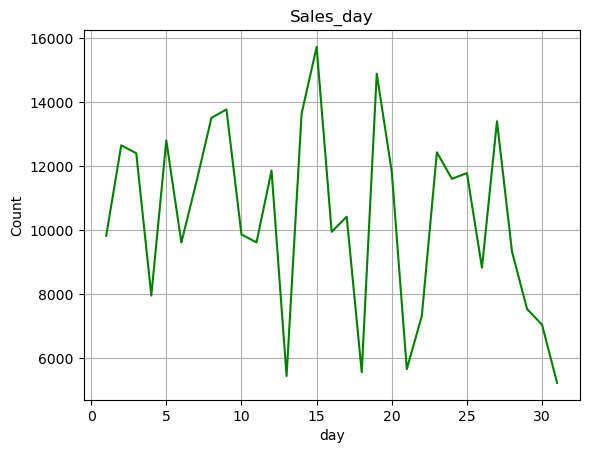

In [184]:
Sales_day.plot(color = ['green'])
plt.grid()
plt.title('Sales_day')
plt.xlabel('day')
plt.ylabel('Count')
plt.show()

In [185]:
Sales_month= Supermarket_Sales.groupby('month').sum(numeric_only=True)['Total']
print(Sales_month)

month
1    116291.868
2     97219.374
3    109455.507
Name: Total, dtype: float64


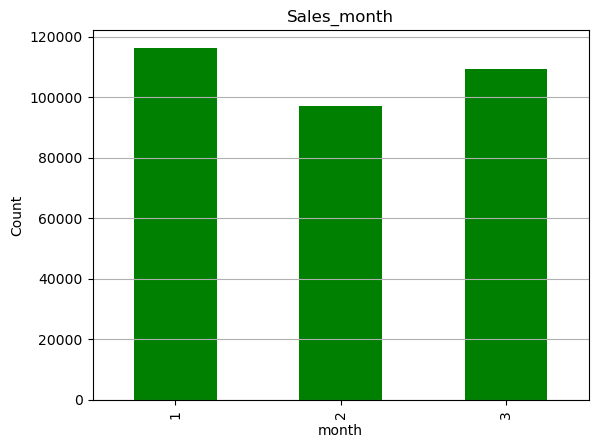

In [191]:
Sales_month.plot(kind= 'bar',color = ['green'])
plt.title('Sales_month')
plt.xlabel('month')
plt.ylabel('Count')
plt.grid(axis= 'y')
plt.show()

### Hour with the most sales

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,...,Payment,cogs,gross margin percentage,gross income,Rating,day,month,year,Tine,Hour
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,...,Ewallet,522.83,4.761905,26.1415,9.1,5,1,2019,0,0
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,...,Cash,76.40,4.761905,3.8200,9.6,8,3,2019,0,0
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,...,Credit card,324.31,4.761905,16.2155,7.4,3,3,2019,0,0
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,...,Ewallet,465.76,4.761905,23.2880,8.4,27,1,2019,0,0
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,...,Ewallet,604.17,4.761905,30.2085,5.3,8,2,2019,0,0
5,699-14-3026,C,Naypyitaw,Normal,Male,Electronic accessories,85.39,7,29.8865,627.6165,...,Ewallet,597.73,4.761905,29.8865,4.1,25,3,2019,0,0
6,355-53-5943,A,Yangon,Member,Female,Electronic accessories,68.84,6,20.6520,433.6920,...,Ewallet,413.04,4.761905,20.6520,5.8,25,2,2019,0,0


In [215]:
Supermarket_Sales['day'] = pd.to_datetime( Supermarket_Sales['Date']).dt.day
Supermarket_Sales['month'] = pd.to_datetime( Supermarket_Sales['Date']).dt.month 
Supermarket_Sales.head(5)


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,...,Payment,cogs,gross margin percentage,gross income,Rating,day,month,year,Tine,Hour
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,...,Ewallet,522.83,4.761905,26.1415,9.1,5,1,2019,0,0
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,...,Cash,76.40,4.761905,3.8200,9.6,8,3,2019,0,0
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,...,Credit card,324.31,4.761905,16.2155,7.4,3,3,2019,0,0
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,...,Ewallet,465.76,4.761905,23.2880,8.4,27,1,2019,0,0
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,...,Ewallet,604.17,4.761905,30.2085,5.3,8,2,2019,0,0


In [219]:
Supermarket_Sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   int64  
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  